In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [12]:
# Load the dataset and separate it into training and testing sets
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist_dataset = mnist_bldr.as_dataset(shuffle_files=False)

mnist_train = mnist_dataset['train']
mnist_test = mnist_dataset['test']

In [14]:
# Preprocess the training and testing sets and create a validation set
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

# Normalize the images in both sets
mnist_train = mnist_train.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0, tf.cast(item['label'], tf.int32)))
mnist_test = mnist_test.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0, tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)
mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=False)

# Separate the training set into a training and validation set
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

In [22]:
# Create the CNN
model = tf.keras.Sequential()

# Add 1st convolution layer and pooling layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding="same", data_format="channels_last", name="conv_1", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name="pool_1"))

# Add 2nd convolution layer and pooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding="same", name="conv_2", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name="pool_2"))

# Flatten the current output layer
model.add(tf.keras.layers.Flatten())

# Add 2 dense layers with a dropout layer in between
model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))

In [23]:
# Compile the model and view its summary
tf.random.set_seed(1)

model.build(input_shape=(None, 28, 28, 1))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_1 (MaxPooling2D)                │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_2 (MaxPooling2D)                │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(mnist_train, epochs=NUM_EPOCHS, validation_data=mnist_valid, shuffle=True)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9001 - loss: 0.3122 - val_accuracy: 0.9832 - val_loss: 0.0515
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9871 - val_loss: 0.0403
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9895 - val_loss: 0.0363
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9879 - val_loss: 0.0425
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9882 - val_loss: 0.0428
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9896 - val_loss: 0.0445
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 0.9891 - val_loss: 0.0427
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9961 - loss: 0.0110 - 

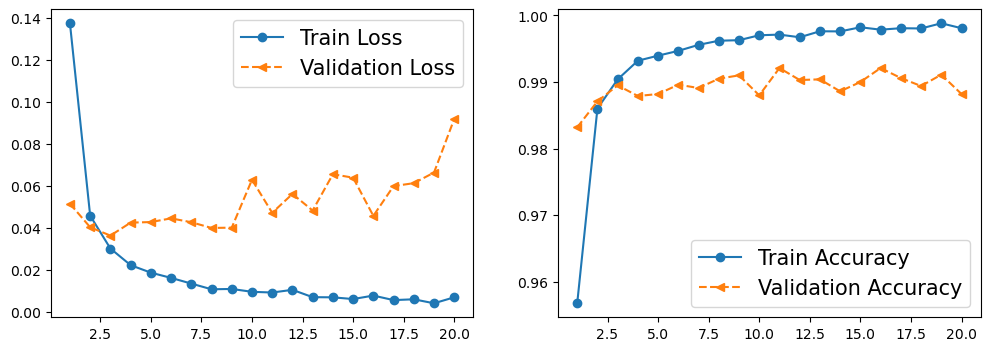

In [18]:
# Plot the graphs of the CNN's loss and accuracy scores
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))

# Plot the the 'Loss' graph
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label="Train Loss")
ax.plot(x_arr, hist['val_loss'], '--<', label="Validation Loss")
ax.legend(fontsize=15)

# Plot the 'Accuracy' graph
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label="Train Accuracy")
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation Accuracy')
ax.legend(fontsize=15)
plt.show()

In [19]:
# Evaluate the results of the training
test_results = model.evaluate(mnist_test.batch(20))
print('Test Accuracy: {:.2f}%'.format(test_results[1] * 100))

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9903 - loss: 0.0532
Test Accuracy: 98.97%


In [20]:
# Collect predictions on a sample batch from the testing set
batch_test = next(iter(mnist_test.batch(12)))
preds = model(batch_test[0])

# Reshape 'preds' to be a list of integers
preds = tf.argmax(preds, axis=1)

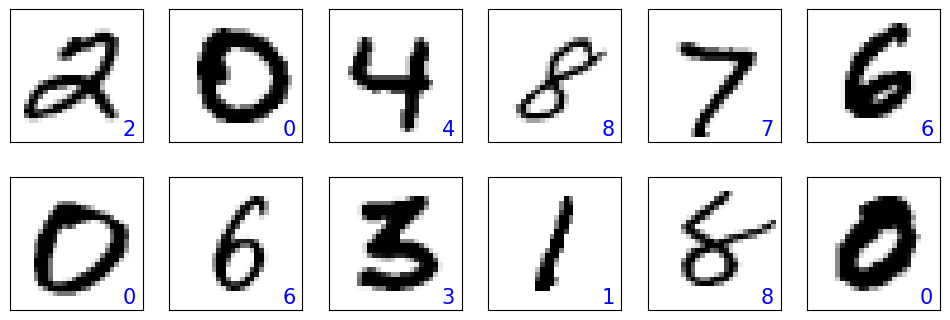

In [21]:
# Display the sample set with the model's predictions
fig = plt.figure(figsize=(12, 4))

for i in range(12):
    ax = fig.add_subplot(2, 6, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), size=15, color='blue', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.show()